In [30]:
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from astropy.convolution import convolve, convolve_fft
from astropy.convolution import Gaussian2DKernel
from matplotlib.colors import LogNorm

In [3]:
fname='edgeon_Ryan_z0_Emission_OVI_1032_270kpc.fits'
tt=fits.open(fname)
oim=np.transpose(tt['PRIMARY'].data, axes=(1,0))

rtoa = 180*3600/np.pi

cim=oim.copy()/rtoa**2

In [4]:
np.shape(cim)

(111, 222)

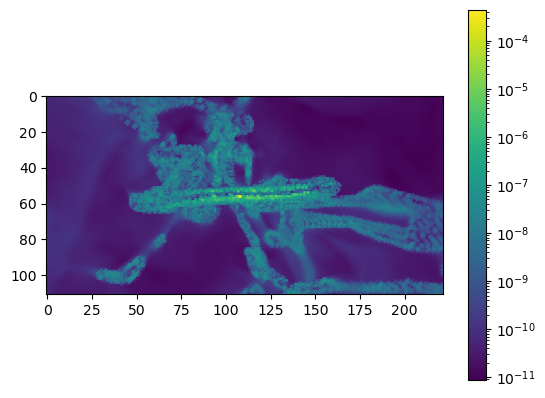

In [38]:
plt.imshow(cim, norm=LogNorm())
plt.colorbar()

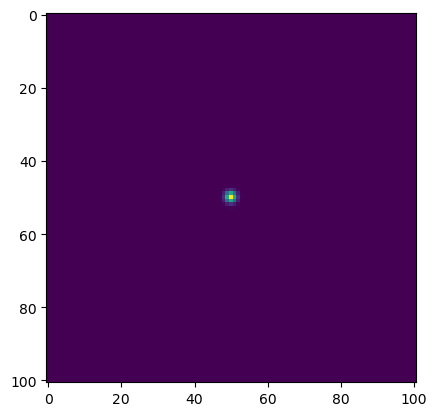

In [25]:
kernel = Gaussian2DKernel(x_stddev=1, x_size=101)
image = convolve_fft(cim, kernel)
plt.imshow(kernel)

In [27]:
print(np.sum(image))
print(np.sum(cim))

0.0008629946699877797
0.0008632423777919226


In [34]:
img_height_in_kpc=30
# dist=1.05/(30/rtoa) #Mpc
dist=7.35 #Mpc, NED, 2013AJ 146 85 TRGB
img_height_in_arcsec=img_height_in_kpc/(dist*1000)*rtoa
cnt_ori=cim*(img_height_in_arcsec/oim.shape[0])**2

In [ ]:
img=ax.matshow((pim*perg), extent=extent, cmap=cm.YlGnBu_r, 
                 norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax),
                  origin='lower', interpolation='none')